# Matplotlib

#### Problem 1

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import special

In [2]:
def variance(n):
    rand = np.random.normal(size=(n,n))
    means = np.mean(rand, axis=1)
    return np.var(means)

In [3]:
def create_array(N):
    result = np.empty_like(N, dtype='f')
    for i, n in enumerate(N):
        result[i] = variance(n)
    return result

In [4]:
N = np.arange(100, 1001, 100)
result = create_array(N)

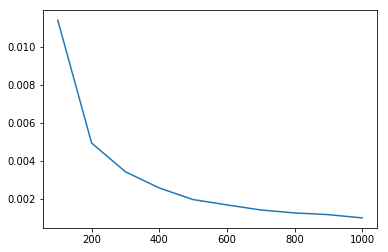

In [5]:
plt.plot(N, result)
plt.show()

#### Problem 2

In [6]:
def plot_3funcs():
    x = np.linspace(- 2 * np.pi, 2 * np.pi, 1000)
    plt.plot(x, np.sin(x))
    plt.plot(x, np.cos(x))
    plt.plot(x, np.arctan(x))
    plt.show()

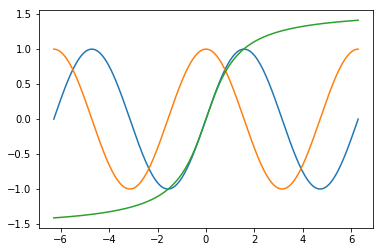

In [7]:
plot_3funcs()

#### Problem 3

In [8]:
def plot_curve():
    x1 = np.linspace(-2, 0.9, 1000)
    x2 = np.linspace(1.1, 6, 1000)
    plt.plot(x1, 1 / (x1 - 1), 'm--', lw=4)
    plt.plot(x2, 1 / (x2 - 1), 'm--', lw=4)
    plt.xlim(-2, 6)
    plt.ylim(-6, 6)
    plt.show()

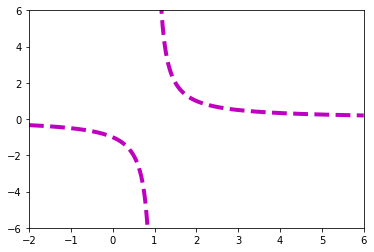

In [9]:
plot_curve()

#### Problem 4

In [10]:
def subplots():
    x = np.linspace(0, 2 * np.pi, 1000)
    
    fig, axes = plt.subplots(2, 2)
    axes[0, 0].plot(x, np.sin(x), 'g-')
    plt.axis([0, 2 * np.pi, -2, 2])
    axes[0, 0].set_title("sin(x)")
    
    axes[0, 1].plot(x, np.sin(2 * x), 'r--')
    plt.axis([0, 2 * np.pi, -2, 2])
    axes[0, 1].set_title("sin(2x)")
    
    axes[1, 0].plot(x, 2 * np.sin(x), 'b--')
    plt.axis([0, 2 * np.pi, -2, 2])
    axes[1, 0].set_title("2sin(x)")

    axes[1, 1].plot(x, 2 * np.sin(2 * x), 'm:')
    plt.axis([0, 2 * np.pi, -2, 2])
    axes[1, 1].set_title("2sin(2x)")
    
    plt.tight_layout()
        
    plt.suptitle("Sine Functions")
        
    plt.show()

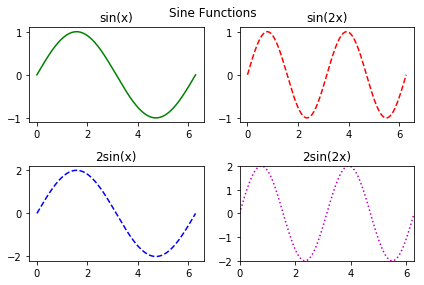

In [11]:
subplots()

#### Problem 5

In [12]:
def vis_fars():
    fars = np.load('FARS.npy')

    
    fig, axes = plt.subplots(1, 2, figsize=(8,3))
    long = fars[:, 1]
    lat = fars[:, 2]
    axes[0].plot(long, lat, 'k,')
    axes[0].set_xlabel("Latitude")
    axes[0].set_ylabel("Longitude")
    axes[0].set_aspect("equal")
    
    hours = fars[:, 0]
    axes[1].hist(hours, 24, (0, 24))
    axes[1].set_xlabel("Hour")
    axes[1].set_ylabel("Car Crashes")
    axes[1].set_xlim((0,24))
    
    plt.tight_layout()
    
    plt.show()

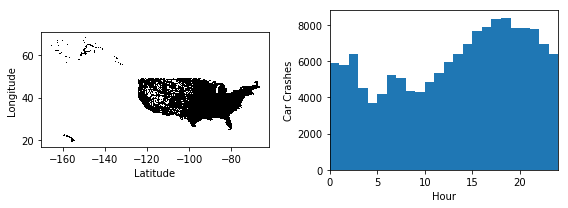

In [13]:
vis_fars()

#### Problem 6

In [14]:
def plot_func():
    x = np.linspace(- 2 * np.pi, 2 * np.pi, 1000)
    y = x.copy()
    X, Y = np.meshgrid(x, y)
    Z = (np.sin(X) * np.sin(Y)) / (X * Y)
    
    plt.figure(figsize=(8,3))
    
    plt.subplot(121)
    plt.pcolormesh(X, Y, Z, cmap='magma')
    plt.axis([-2 * np.pi, 2 * np.pi, -2 * np.pi, 2 * np.pi])
    plt.colorbar()
    
    plt.subplot(122)
    plt.contour(X, Y, Z, 20, cmap='coolwarm')
    plt.axis([-2 * np.pi, 2 * np.pi, -2 * np.pi, 2 * np.pi])
    plt.colorbar()
    
    plt.show()

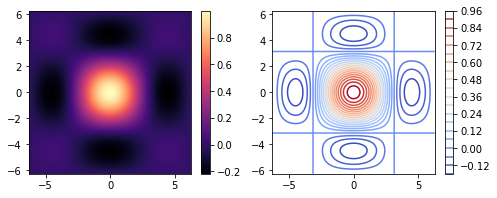

In [15]:
plot_func()

# Data Visualization

In [16]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

#### Problem 1

In [17]:
anscombe = np.load('anscombe.npy')

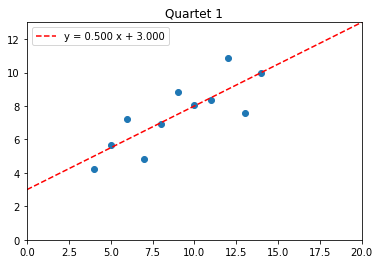

mean of x1: 9.0
variance of x1: 10.0
mean of y1: 7.501
variance of y1: 3.752
slope of regression 1: 0.5
intercept of regression 1: 3.0
correlation coefficient of regression 1: 0.816


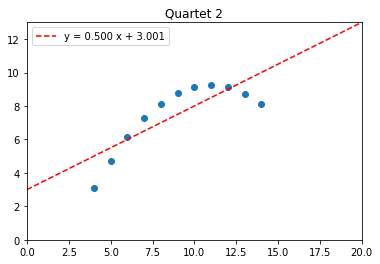

mean of x2: 9.0
variance of x2: 10.0
mean of y2: 7.501
variance of y2: 3.752
slope of regression 2: 0.5
intercept of regression 2: 3.001
correlation coefficient of regression 2: 0.816


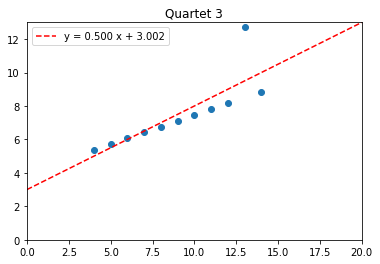

mean of x3: 9.0
variance of x3: 10.0
mean of y3: 7.5
variance of y3: 3.748
slope of regression 3: 0.5
intercept of regression 3: 3.002
correlation coefficient of regression 3: 0.816


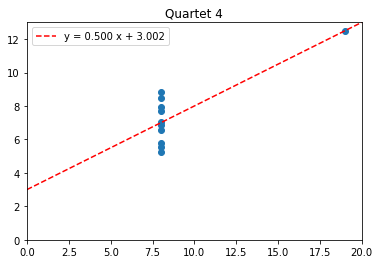

mean of x4: 9.0
variance of x4: 10.0
mean of y4: 7.501
variance of y4: 3.748
slope of regression 4: 0.5
intercept of regression 4: 3.002
correlation coefficient of regression 4: 0.817


In [18]:
x = anscombe[:,::2]
y = anscombe[:,1::2]
for i in range(4):
    xi = x[:, i]
    yi = y[:, i]
    plt.scatter(xi, yi)
    plt.xlim(0,20)
    plt.ylim(0,13)
    slope, intercept, r_val, p_val, se = stats.linregress(xi, yi)
    domain = np.linspace(0,20,10)
    plt.plot(domain, slope * domain + intercept, 'r--', label=f'y = {slope:.3f} x + {intercept:.3f}')
    plt.legend()
    plt.title(f'Quartet {i+1}')
    plt.show()
    
    print(f"mean of x{i+1}:", np.mean(xi))
    print(f"variance of x{i+1}:", np.var(xi))
    print(f"mean of y{i+1}:", round(np.mean(yi), 3))
    print(f"variance of y{i+1}:", round(np.var(yi), 3))
    print(f"slope of regression {i+1}:", round(slope, 3))
    print(f"intercept of regression {i+1}:", round(intercept, 3))
    print(f"correlation coefficient of regression {i+1}:", round(r_val, 3))

The means and variances of x and y, correlation coefficients, and slopes and intercepts of the regressions are the same for each plot, but the distributions of points are very different.

#### Problem 2

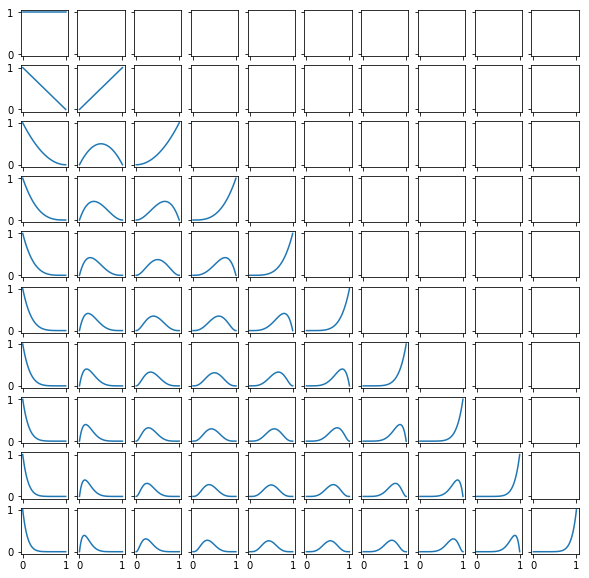

In [19]:
N = 10
fig, axes = plt.subplots(N, N, figsize=(10,10), sharex=True, sharey=True)

for n in range(N):
    for v in range(n+1):
        x = np.linspace(0, 1, 100)
        b = special.binom(n, v) * x ** v * (1 - x) ** (n - v)
        axes[n][v].plot(x, b)


#### Problem 3

In [20]:
mlb = np.load('MLB.npy')

In [21]:
height = mlb[:, 0]
weight = mlb[:, 1]
age = mlb[:, 2]

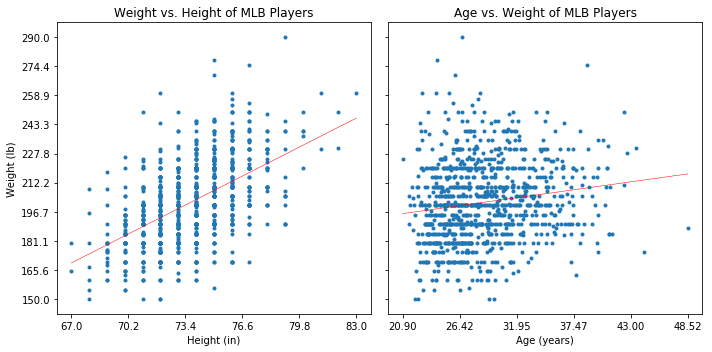

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

axes[0].scatter(height, weight, marker='.')
m, b, r, p, se = stats.linregress(height, weight)
int_h = np.linspace(np.min(height), np.max(height), 6)
int_w = np.linspace(np.min(weight), np.max(weight), 10)
axes[0].plot(int_h, m * int_h + b, 'r', lw=0.5)
axes[0].set_xticks(int_h)
axes[0].set_yticks(int_w)
axes[0].set_xlabel('Height (in)')
axes[0].set_ylabel('Weight (lb)')
axes[0].set_title('Weight vs. Height of MLB Players')

axes[1].scatter(age, weight, marker='.')
slope, intercept, r, p, se = stats.linregress(age, weight)
int_age = np.linspace(np.min(age), np.max(age), 6)
axes[1].plot(int_age, slope * int_age + intercept, 'r', lw=0.5)
axes[1].set_xticks(int_age)
axes[1].set_xlabel('Age (years)')
axes[1].set_title('Age vs. Weight of MLB Players')

plt.tight_layout()
plt.show()

#### Problem 4

In [23]:
eq = np.load('earthquakes.npy')

In [24]:
date = eq[:, 0]
mag = eq[:, 1]
long = eq[:, 2]
lat = eq[:, 3]

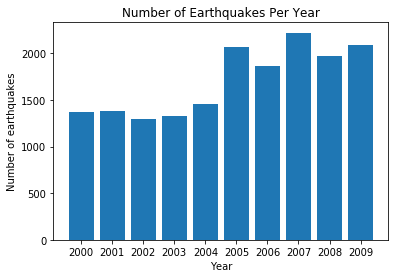

In [25]:
in_year = np.zeros(10)
years = np.array(date, dtype=int)
total = [sum(years == year) for year in np.unique(years)]

plt.bar(np.unique(years), total)
plt.xticks(np.unique(years))
plt.title("Number of Earthquakes Per Year")
plt.xlabel("Year")
plt.ylabel("Number of earthquakes")

plt.show()

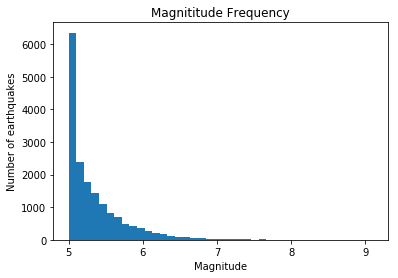

In [26]:
plt.hist(mag, bins=40)
plt.title("Magnititude Frequency")
plt.xlabel("Magnitude")
plt.ylabel("Number of earthquakes")

plt.show()

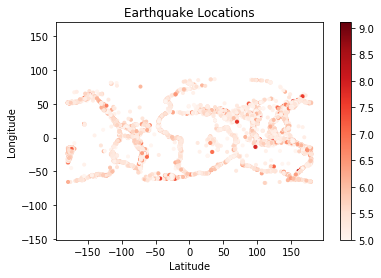

In [27]:
plt.scatter(long, lat, marker='.', c=mag, cmap="Reds")
plt.colorbar()
plt.title('Earthquake Locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.axis("equal")

plt.show()

#### Problem 5

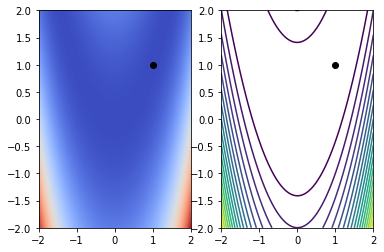

In [28]:
x = np.linspace(-2,2,1000)
y = np.linspace(-2,2,1000)
X, Y = np.meshgrid(x, y)
Z = (1 - X) ** 2 + 100 * (Y - X ** 2) ** 2

fig, axes = plt.subplots(1, 2)

axes[0].pcolormesh(X, Y, Z, cmap="coolwarm")
axes[0].scatter(1, 1, c='k')
axes[1].contour(X, Y, Z, 20, cmap="viridis")
axes[1].scatter(1, 1, c='k')

plt.show()

#### Problem 6

In [29]:
country_data = np.load("countries.npy")

In [30]:
pop = country_data[:, 0]
GDP = country_data[:, 1]
m_height = country_data[:, 2]
f_height = country_data[:, 3]

In [31]:
countries = np.array(["Austria", "Bolivia", "Brazil", "China",
            "Finland", "Germany", "Hungary", "India",
            "Japan", "North Korea", "Montenegro", "Norway",
            "Peru", "South Korea", "Sri Lanka", "Switzerland",
            "Turkey", "United Kingdom", "United States", "Vietnam"])

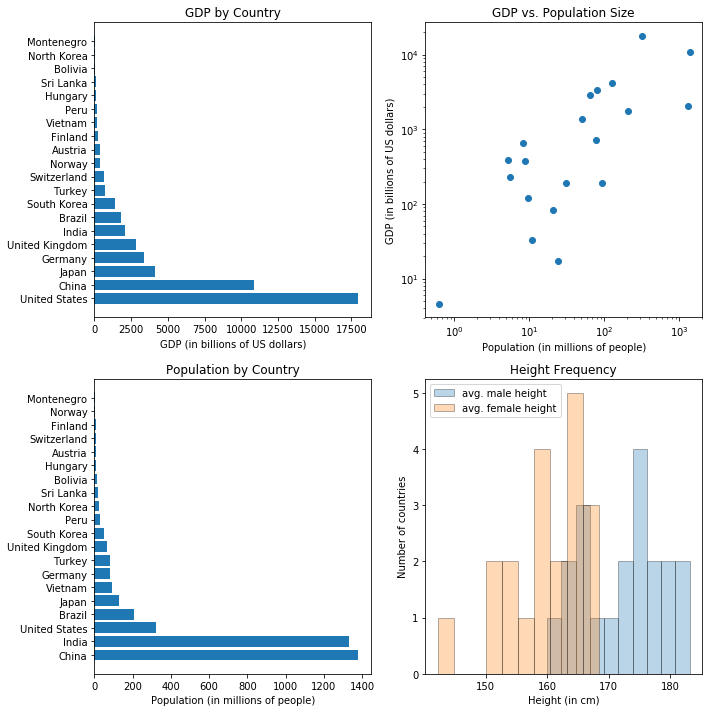

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

GDP_ind = np.argsort(GDP)[::-1]
GDP_sorted = GDP[GDP_ind]
countries_sortedby_GDP = countries[GDP_ind]

axes[0, 0].barh(np.arange(len(countries_sortedby_GDP)), GDP_sorted)
axes[0, 0].set_yticks(np.arange(len(countries_sortedby_GDP)))
axes[0, 0].set_yticklabels(countries_sortedby_GDP)
axes[0, 0].set_xlabel("GDP (in billions of US dollars)")
axes[0, 0].set_title("GDP by Country")

axes[0, 1].scatter(pop, GDP)
axes[0, 1].set_xscale("log")
axes[0, 1].set_yscale("log")
axes[0, 1].set_xlabel("Population (in millions of people)")
axes[0, 1].set_ylabel("GDP (in billions of US dollars)")
axes[0, 1].set_title("GDP vs. Population Size")

pop_ind = np.argsort(pop)[::-1]
pop_sorted = pop[pop_ind]
countries_sortedby_pop = countries[pop_ind]

axes[1, 0].barh(np.arange(len(countries_sortedby_pop)), pop_sorted)
axes[1, 0].set_yticks(np.arange(len(countries_sortedby_pop)))
axes[1, 0].set_yticklabels(countries_sortedby_pop)
axes[1, 0].set_xlabel("Population (in millions of people)")
axes[1, 0].set_title("Population by Country")

axes[1, 1].hist(m_height, edgecolor='k', alpha=0.3, bins=10, label="avg. male height")
axes[1, 1].hist(f_height, edgecolor='k', alpha=0.3, bins=10, label="avg. female height")
axes[1, 1].set_xlabel("Height (in cm)")
axes[1, 1].set_ylabel("Number of countries")
axes[1, 1].legend()
axes[1, 1].set_title("Height Frequency")

plt.tight_layout()
plt.show()

# Pandas I

In [33]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#### Problem 1

In [34]:
labels = np.arange(0, 51, 2)
series = pd.Series((i ** 2 - 1 for i in labels), index = labels)
series[series.index % 3 == 0] = 0
print(series)

0        0
2        3
4       15
6        0
8       63
10      99
12       0
14     195
16     255
18       0
20     399
22     483
24       0
26     675
28     783
30       0
32    1023
34    1155
36       0
38    1443
40    1599
42       0
44    1935
46    2115
48       0
50    2499
dtype: int64


#### Problem 2

In [35]:
def stock_val(p, d=100):
    dates = pd.date_range("1/1/2000", "12/31/2000")
    value = pd.Series([np.random.binomial(1, p) for date in dates], index = dates)
    value[value == 0] = -1
    value[0] = d
    tot_val = value.cumsum()
    tot_val[tot_val < 0] = 0
    return tot_val

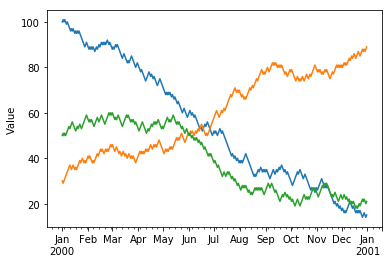

In [36]:
stock1 = stock_val(0.4, 100)
stock2 = stock_val(0.6, 30)
stock3 = stock_val(0.5, 50)
stock1.plot()
stock2.plot()
stock3.plot()
plt.ylabel('Value')
plt.show()

#### Problem 3

In [37]:
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})

studentInfo[(studentInfo['Age'] > 19) & (studentInfo['Sex'] == 'M')][['ID', 'Name']]

,ID,Name
0,0,Mylan
6,6,Matt


#### Problem 4

In [38]:
pd.merge(studentInfo[studentInfo['Sex'] == 'M'], otherInfo, how='left')[['ID', 'Age', 'GPA']]

,ID,Age,GPA
0,0,20,3.8
1,2,18,3.0
2,4,19,2.8
3,6,20,3.8
4,7,19,3.4


#### Problem 5

In [39]:
crime = pd.read_csv('crime_data.txt', delimiter=',', index_col = 'Year', skiprows=1)

In [40]:
crime['Crime-Rate'] = crime['Total'] / crime['Population']

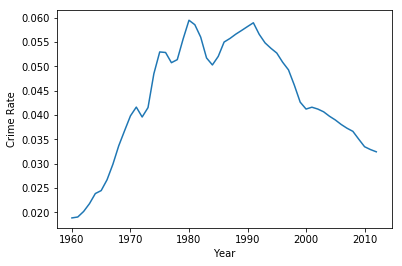

In [41]:
crime['Crime-Rate'].plot()
plt.ylabel("Crime Rate")
plt.show()

In [42]:
crime['Crime-Rate'].nlargest(5)

Year
1980    0.059500
1991    0.058978
1981    0.058582
1990    0.058203
1989    0.057410
Name: Crime-Rate, dtype: float64

In [43]:
print("Average number of total crimes:", crime['Total'].mean())
print("Average number of burglary crimes:", crime['Burglary'].mean())

Average number of total crimes: 10638068.075471697
Average number of burglary crimes: 2446286.2075471696


In [44]:
list(crime[(crime['Total'] < crime['Total'].mean()) & (crime['Burglary'] > crime['Burglary'].mean())].index)

[1973, 1974]

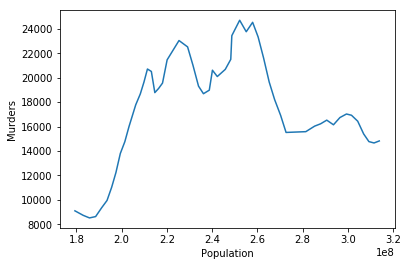

In [45]:
plt.plot(crime['Population'], crime['Murder'])
plt.xlabel("Population")
plt.ylabel("Murders")
plt.show()

In [46]:
crime1980 =  crime[[crime.index[i] >= 1980 and crime.index[i] < 1990 for i 
                    in range(len(crime))]][['Population', 'Violent', 'Robbery']]
crime1980.to_csv('crime1980.csv')

#### Problem 6

In [63]:
from pydataset import data
import numpy as np
import pandas as pd

In [64]:
titanic = pd.read_csv('titanic.csv', header=0)

In [67]:
titanic.drop(['Sibsp', 'Parch', 'Cabin', 'Boat', 'Body', 'home.dest'], axis=1, inplace=True)

In [69]:
titanic.dropna(subset=['Survived'], inplace=True)

In [71]:
titanic['Survived'] = titanic['Survived'].astype(bool)

In [72]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [73]:
titanic.to_csv('new_titanic.csv')

In [75]:
print("Number of people that survived:", titanic['Survived'].sum())

Number of people that survived: 500


In [76]:
print("Percentage of passengers that survived:", round(titanic['Survived'].sum() / len(titanic), 3) * 100, "%")

Percentage of passengers that survived: 38.2 %


In [77]:
print("Average ticket price:", round(titanic['Fare'].mean(), 2))

Average ticket price: 33.3


In [78]:
print("Most expensive ticket cost:", round(titanic['Fare'].max(), 2))

Most expensive ticket cost: 512.33


In [79]:
print("Oldest Survivor:", round(titanic[titanic['Survived'] == True]['Age'].max(), 3))

Oldest Survivor: 80.0


In [80]:
print("Youngest Survivor:", round(titanic[titanic['Survived'] == True]['Age'].min(), 3))

Youngest Survivor: 0.167


In [81]:
print("Oldest Non-survivor:", round(titanic[titanic['Survived'] == False]['Age'].max(), 3))

Oldest Non-survivor: 74.0


In [82]:
print("Youngest Non-survivor:", round(titanic[titanic['Survived'] == False]['Age'].min(), 3))

Youngest Non-survivor: 0.333


# Pandas II

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
from pydataset import data

In [85]:
arb = data('Arbuthnot')

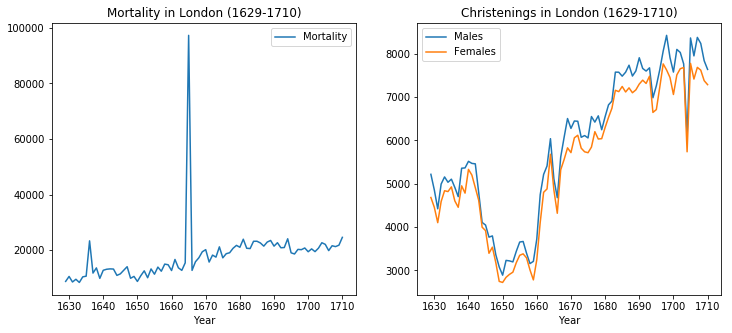

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
arb.plot("Year", "Mortality", ax=axes[0], title="Mortality in London (1629-1710)")
arb.plot(x="Year", y="Males", ax=axes[1])
arb.plot(x="Year", y="Females", ax=axes[1], title="Christenings in London (1629-1710)")

plt.show()

In [87]:
trees = data('trees')

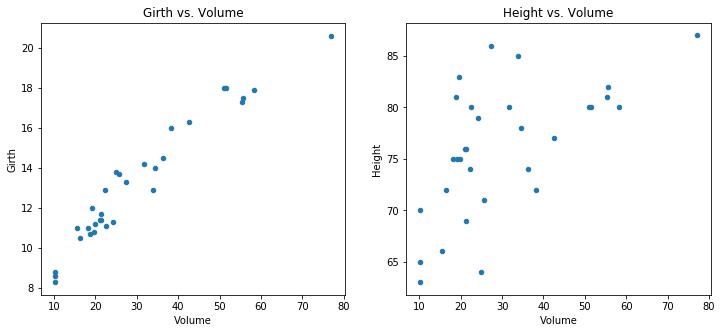

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
trees.plot(kind='scatter', x='Volume', y='Girth', ax=axes[0], title="Girth vs. Volume")
trees.plot(kind='scatter', x='Volume', y='Height', ax=axes[1], title="Height vs. Volume")

plt.show()

In [89]:
lung = data('lung')

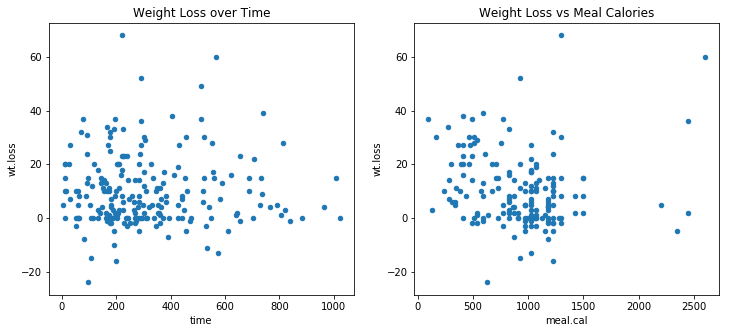

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
lung.plot(kind='scatter', x='time', y='wt.loss', ax=axes[0], title="Weight Loss over Time")
lung.plot(kind='scatter', x='meal.cal', y='wt.loss', ax=axes[1], title="Weight Loss vs Meal Calories")

plt.show()

In [91]:
road = data('road')

In [92]:
road.head()

,deaths,drivers,popden,rural,temp,fuel
Alabama,968,158,64.0,66.0,62,119.0
Alaska,43,11,0.4,5.9,30,6.2
Arizona,588,91,12.0,33.0,64,65.0
Arkanas,640,92,34.0,73.0,51,74.0
Calif,4743,952,100.0,118.0,65,105.0


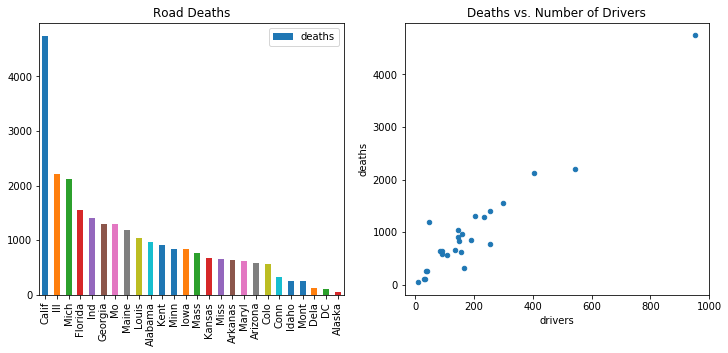

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
road_sorted = road.sort_values('deaths', ascending=False)
road_sorted.plot(kind='bar', y='deaths', ax=axes[0], title='Road Deaths')
road.plot(kind='scatter', x='drivers', y='deaths', ax=axes[1], title="Deaths vs. Number of Drivers")

plt.show()

In [94]:
bfeed = data('bfeed')

In [95]:
bfeed.head()

,duration,delta,race,poverty,smoke,alcohol,agemth,ybirth,yschool,pc3mth
1,16,1,1,0,0,1,24,82,14,0
2,1,1,1,0,1,0,26,85,12,0
3,4,0,1,0,0,0,25,85,12,0
4,3,1,1,0,1,1,21,85,9,0
5,36,1,1,0,1,0,22,82,12,0


[]

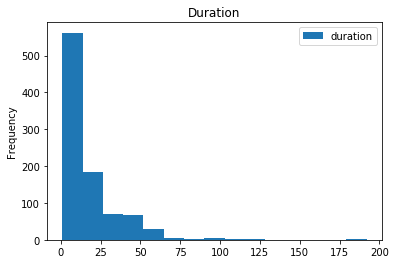

In [96]:
bfeed.plot(kind='hist', y='duration', bins=15, title="Duration")
plt.plot()

# Pandas III

#### Problem 1

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import numpy as np

In [98]:
iris = data('iris')

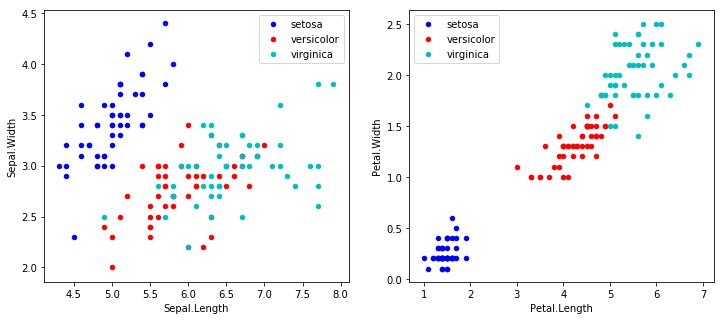

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
colors = ['b', 'r', 'c']
for species, c in zip(iris.Species.unique(), colors):
    species_plot = iris[iris['Species'] == species]
    species_plot.plot(kind='scatter', x='Sepal.Length', y='Sepal.Width', ax=axes[0], color=c, label=species)
    
for species, c in zip(iris.Species.unique(), colors):
    species_plot = iris[iris['Species'] == species]
    species_plot.plot(kind='scatter', x='Petal.Length', y='Petal.Width', ax=axes[1], color=c, label=species)

plt.show()

In [100]:
print("Setosas are easiest to distinguish from the others\nby sepal and petal length.")

Setosas are easiest to distinguish from the others
by sepal and petal length.


In [101]:
print("To identify the flower's species, measure petal and\nsepal length and compare to the species' averages.")

To identify the flower's species, measure petal and
sepal length and compare to the species' averages.


In [102]:
poisons = data('poisons')

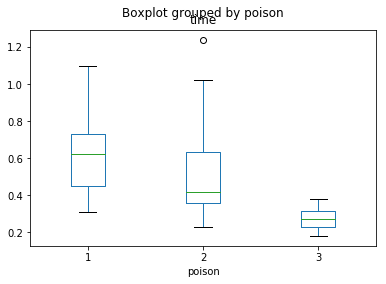

In [103]:
poisons.boxplot('time', by='poison', grid=False)
plt.show()

In [104]:
print("Poison 3 is most deadly.")

Poison 3 is most deadly.


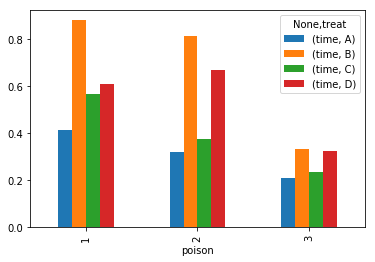

In [105]:
treatment_plot = poisons.groupby(['poison', 'treat']).mean().unstack()
treatment_plot.plot(kind='bar')
plt.show()

In [106]:
print("Choose treatment A if unsure of the poison.")

Choose treatment A if unsure of the poison.


In [107]:
diamonds = data('diamonds')

In [108]:
diamonds_plot = diamonds.groupby(['color', 'cut']).mean().unstack()

[]

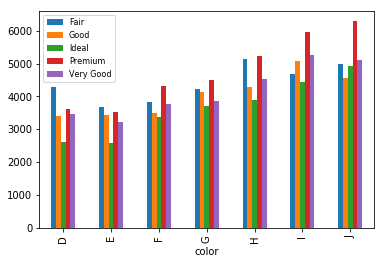

In [109]:
diamonds_plot.plot(kind='bar', y='price')
plt.legend(fontsize=8)
plt.plot()

"Premium diamonds are the most expensive cut and color 'J' is the most expensive color.

In [110]:
diamonds_H = diamonds[diamonds['color']=='H'].groupby('cut').mean()

In [111]:
diamonds_H['Volume'] = diamonds_H['x'] * diamonds_H['y'] * diamonds_H['x']

[]

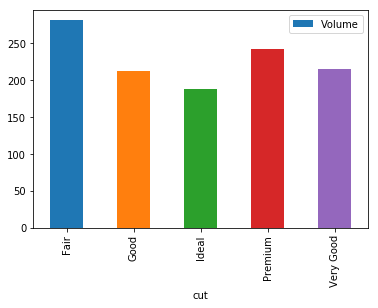

In [112]:
diamonds_H.plot(kind='bar', y='Volume')
plt.plot()

The fair cut sells for a higher price than the ideal cut because these diamonds are larger on average.

#### Problem 2

In [113]:
titanic = pd.read_csv('titanic.csv')

In [114]:
titanic.groupby('Embarked').mean().unstack()['Survived']

Embarked
C    0.555556
Q    0.357724
S    0.332604
dtype: float64

In [115]:
titanic.pivot_table(values='Survived', index='Embarked', columns='Sex')

Sex,female,male
Embarked,,
C,0.902655,0.305732
Q,0.616667,0.111111
S,0.680412,0.170144


Both men and women who embarked from C were most likely to survive. This could be due to the proportion of individuals in class embarking from each location.

In [116]:
titanic.pivot_table(values='Survived', index='Embarked', columns='Pclass', aggfunc="count")

Pclass,1.0,2.0,3.0
Embarked,,,
C,141,28,101
Q,3,7,113
S,177,242,495


In [117]:
titanic.dropna(subset=['Age'], inplace=True)
age = pd.qcut(titanic['Age'], 3)
titanic.pivot_table(values='Survived', index='Embarked', columns=age, dropna=True, aggfunc="count")

Age,"(0.166, 23.0]","(23.0, 34.0]","(34.0, 80.0]"
Embarked,,,
C,62,59,91
Q,20,16,14
S,278,264,240


# Pandas IV

#### Problem 1

In [118]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

In [119]:
DJIA = pd.read_csv('DJIA.csv', parse_dates=True, index_col='DATE')
DJIA.drop(DJIA[DJIA['VALUE'] == '.'].index, inplace=True)
DJIA['VALUE'] = DJIA['VALUE'].astype(float)

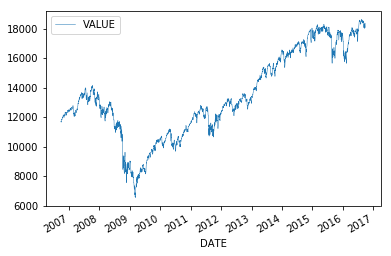

In [120]:
DJIA.plot(lw=0.5)
plt.show()

#### Problem 2

In [121]:
paychecks = pd.read_csv('paychecks.csv', names=['Paycheck'])
payday1 = pd.date_range(start='3/13/2008', periods=47, freq='WOM-1FRI')
payday3 = pd.date_range(start='3/13/2008', periods=46, freq='WOM-3FRI')
payday = payday1.union(payday3)
paychecks = paychecks.set_index(payday)

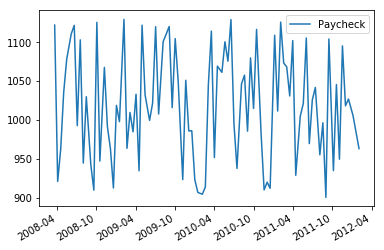

In [122]:
paychecks.plot()
plt.show()

#### Problem 3

In [123]:
finances = pd.read_csv('finances.csv')
finances.index = pd.period_range(start='2008-09', periods=84, freq='Q-AUG')

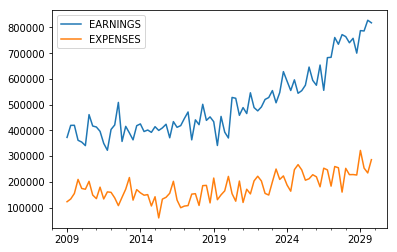

In [124]:
finances.plot()
plt.show()

#### Problem 4

In [125]:
traffic = pd.read_csv('website_traffic.csv', parse_dates=['ENTER', 'LEAVE'])

In [126]:
traffic['DURATION'] = traffic['LEAVE'] - traffic['ENTER']
traffic['DURATION'] = [traffic['DURATION'][i].total_seconds() for i in range(len(traffic))]
traffic.set_index('ENTER', inplace=True)

In [127]:
minute = traffic.resample("T").mean()
hour = traffic.resample("H").mean()

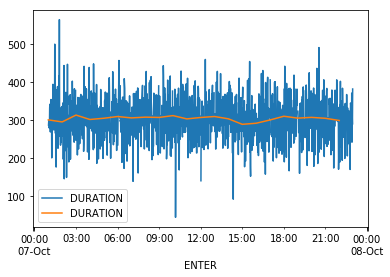

In [128]:
fig, axes = plt.subplots()
minute.plot(ax = axes)
hour.plot(ax = axes)
plt.show()

#### Problem 5

In [129]:
DJIA = pd.read_csv('DJIA.csv', parse_dates=True, index_col='DATE')
DJIA.drop(DJIA[DJIA['VALUE'] == '.'].index, inplace=True)
DJIA['VALUE'] = DJIA['VALUE'].astype(float)

In [130]:
DJIA = DJIA - DJIA.shift(1)

In [131]:
DJIA.sort_values('VALUE', inplace=True)
DJIA.dropna(inplace=True)

In [132]:
DJIA[-1:]

,VALUE
DATE,
2008-10-13,936.42


The single day with the largest gain was 10/13/2008.

In [133]:
DJIA[:1]

,VALUE
DATE,
2008-09-29,-777.68


The single day with the largest loss was 9/29/2008.

In [134]:
months = DJIA.resample('M').sum()

In [135]:
months.sort_values('VALUE', inplace=True)

In [136]:
months[-1:]

,VALUE
DATE,
2015-10-31,1378.84


The month with the largest gain was 10/2015

In [137]:
months[:1]

,VALUE
DATE,
2008-10-31,-1525.65


The month with the largest loss was 10/2008.

#### Problem 6

In [138]:
DJIA = pd.read_csv('DJIA.csv', parse_dates=True, index_col='DATE')
DJIA.drop(DJIA[DJIA['VALUE'] == '.'].index, inplace=True)
DJIA['VALUE'] = DJIA['VALUE'].astype(float)

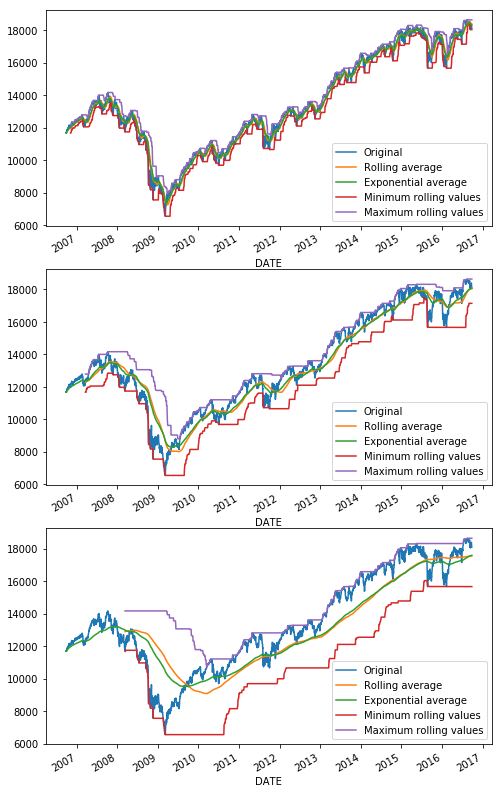

In [139]:
fig, axes = plt.subplots(3, 1, figsize=(8,15))
window = [30, 120, 365]
for i in range(3):
    DJIA.plot(ax=axes[i])
    DJIA.rolling(window=window[i]).mean().plot(ax=axes[i])
    DJIA.ewm(span=window[i]).mean().plot(ax=axes[i])
    DJIA.rolling(window=window[i]).min().plot(ax=axes[i])
    DJIA.rolling(window=window[i]).max().plot(ax=axes[i])
    axes[i].legend(['Original', 'Rolling average', 'Exponential average', 'Minimum rolling values', 'Maximum rolling values'])

With a shorter window, the approximations are close to the original data. With a longer window, the approximations are less exact.

# A Lifetime of Temperatures

In [140]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

In [141]:
indianapolis = pd.read_csv('indianapolis.csv', index_col='DATE', parse_dates=True)
pittsburgh = pd.read_csv('pittsburgh.csv', index_col='DATE', parse_dates=True)
miami = pd.read_csv('miami.csv', index_col='DATE', parse_dates=True)
washingtondc = pd.read_csv('washingtondc.csv', index_col='DATE', parse_dates=True)
chicago = pd.read_csv('chicago.csv', index_col='DATE', parse_dates=True)
lifetime = pd.concat([indianapolis, pittsburgh, washingtondc, chicago])
lifetime.drop('STATION', axis=1, inplace=True)
lifetime.sort_index(inplace=True)

In [142]:
lifetime['day'] = lifetime.index.copy()
lifetime['color'] = 'black'
lifetime.loc[(lifetime.index >= '06/03/2006') & (lifetime.index <= '10/31/2016'), 'color'] = 'maroon'
lifetime.loc[(lifetime.index == '01/22/1975') | (lifetime.index == '07/14/1988'), 'color'] = 'yellow'
lifetime.index = lifetime.index.dayofyear

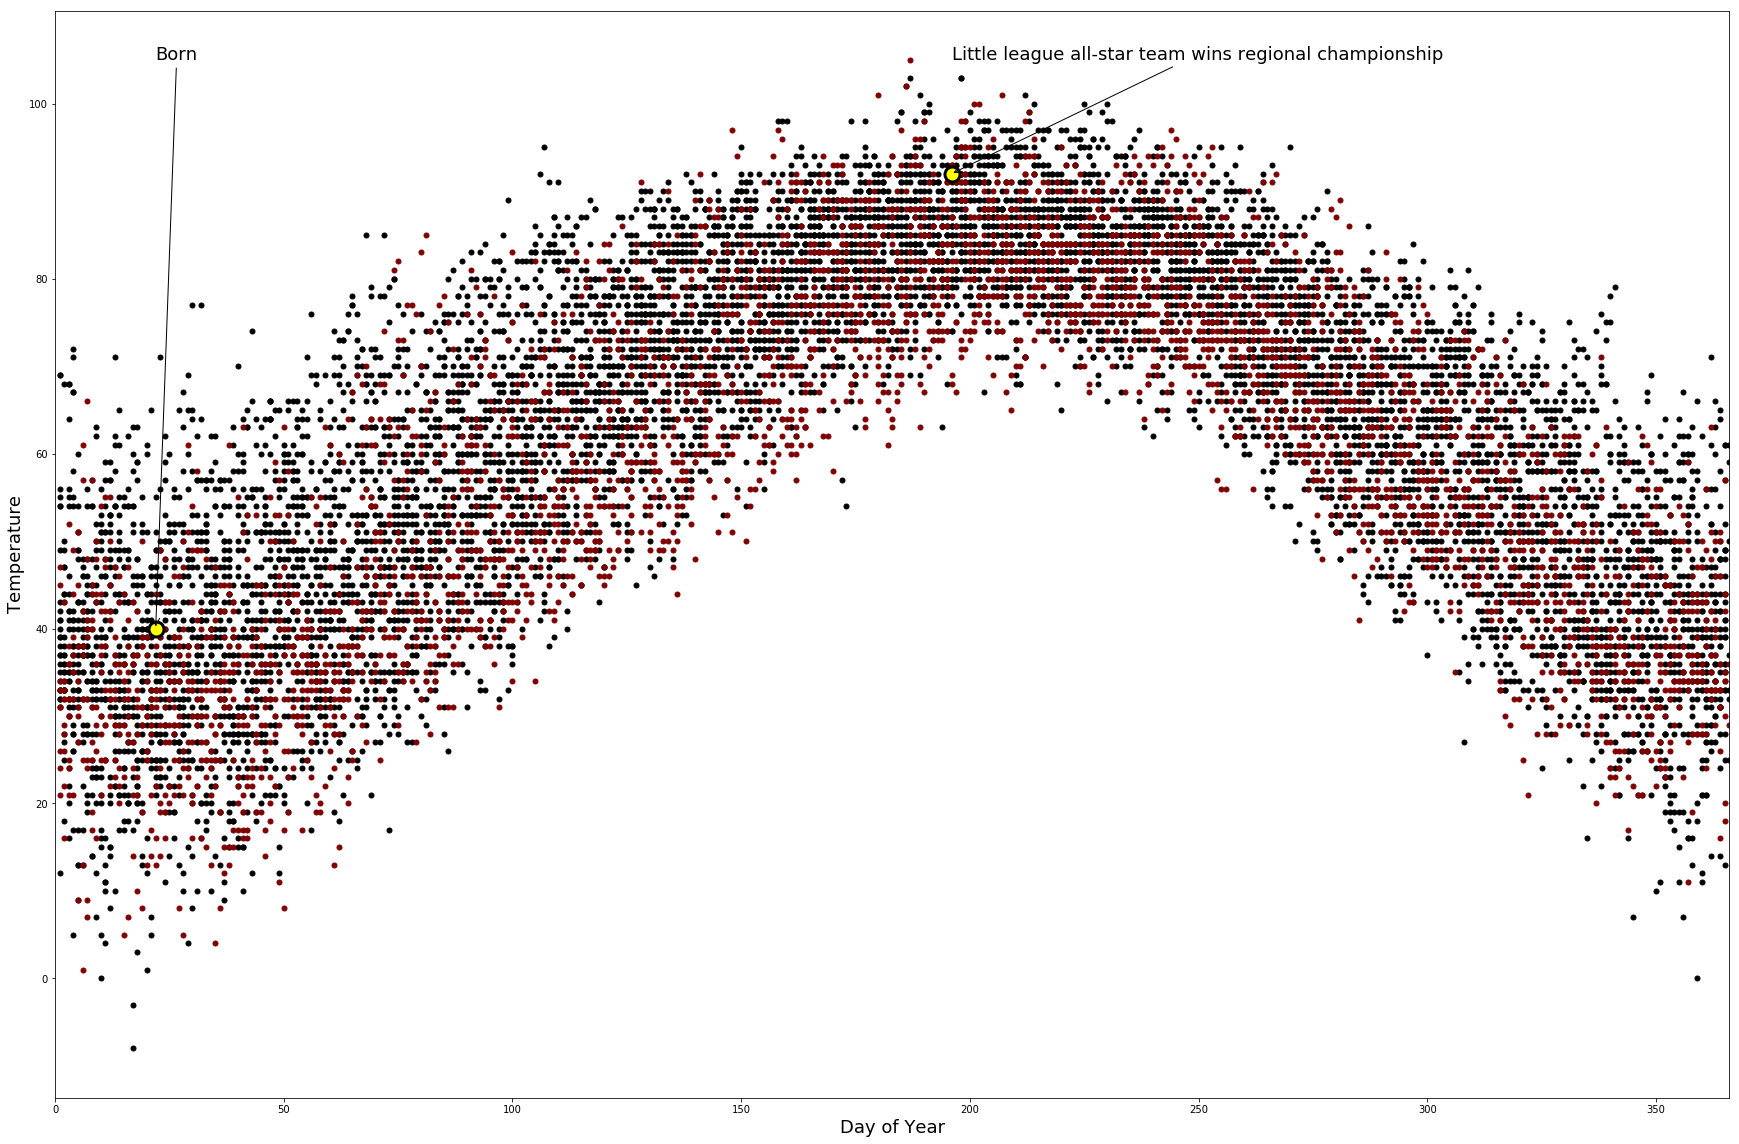

In [143]:
fig, axes = plt.subplots(figsize=(30,20))
for c in ['black', 'maroon']:
    lifetime[lifetime.color == c].plot(y='TMAX', marker='o', ls='', markersize=5, ax=axes, color=c, legend=False)
lifetime[lifetime.color == 'yellow'].plot(y='TMAX', marker='o', ls='', markeredgecolor='black', markeredgewidth=3, markersize=15, ax=axes, color='yellow', legend=False)
plt.ylabel("Temperature", fontsize=18)
plt.xlabel("Day of Year", fontsize=18)
plt.xlim([0,366])

events = lifetime[lifetime.color == 'yellow']
description = ['Born', 'Little league all-star team wins regional championship']

for i in range(2):
    x = events.iloc[i].day.dayofyear
    y = events.iloc[i].TMAX
    
    axes.annotate(description[i], (x, y), xytext=(x, lifetime.TMAX.max()), size = 18, arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()

# Comparing Segments of Time Series

In [144]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

In [145]:
payems = pd.read_csv('payems.csv', index_col='DATE')

In [146]:
payems['PAYEMS'] = payems['PAYEMS'] * 1000

In [147]:
y19 = payems[:'12/1/67']
y20 = payems['1/1/68':]

y19['DATE'] = y19.index.copy().to_datetime()
y19['DATE'] = y19['DATE'].apply(lambda x: x - pd.DateOffset(years=100))
y19.set_index('DATE', inplace=True)

y20['DATE'] = y20.index.copy().to_datetime()
y20.set_index('DATE', inplace=True)

payems = pd.concat([y19, y20])
payems = payems.resample('MS').ffill()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: to_datetime is deprecated. Use pd.t

In [148]:
peaks = ['1929-08-01', '1937-05-01', '1945-02-01', '1948-11-01', '1953-07-01',
         '1957-08-01', '1960-04-01', '1969-12-01', '1973-11-01', '1980-01-01', 
         '1981-07-01', '1990-07-01', '2001-03-01', '2007-12-01']

peaks = [pd.to_datetime(peaks[i], format='%Y-%m-%d') for i in range(14)]
peaks[0].date
recessions = []
start = pd.to_datetime('1929-07-01')
end = peaks[0] + pd.DateOffset(years=10, months=5)
recessions.append(pd.DataFrame(payems['PAYEMS'][:end.date()], columns=['PAYEMS']))

for i in range(1, 14):
    start = peaks[i] - pd.DateOffset(years=1)
    end = peaks[i] + pd.DateOffset(years=10, months=5)
    recessions.append(pd.DataFrame(payems['PAYEMS'][start.date():end.date()], columns=['PAYEMS']))

In [149]:
for i in range(14):
    recessions[i].PAYEMS = recessions[i].PAYEMS / recessions[i].PAYEMS[peaks[i]]

In [150]:
recessions[0].head()

,PAYEMS
DATE,
1929-07-01,1.0
1929-08-01,1.0
1929-09-01,1.0
1929-10-01,1.0
1929-11-01,1.0


In [151]:
daterange = pd.date_range(start='1928-08-01', end='1929-06-01', freq='MS')
empty = pd.DataFrame(np.array([np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]), columns=['PAYEMS'], index=daterange)
recessions[0] = pd.concat([empty, recessions[0]])

In [152]:
timeline = pd.Series(['' for i in range(138)], name='Timeline')
timeline.at[0] = '-1yr'
for n, i in enumerate(range(12, 138, 12)):
    if n == 0:
        timeline.at[i] = 'peak'
    else:
        timeline.at[i] = f'+{n}yr'

In [153]:
for i in range(14):
    timeline.index = recessions[i].index
    recessions[i]['Timeline'] = timeline
    recessions[i]['Dates'] = recessions[i].index.copy()
    recessions[i].set_index('Timeline', inplace=True)

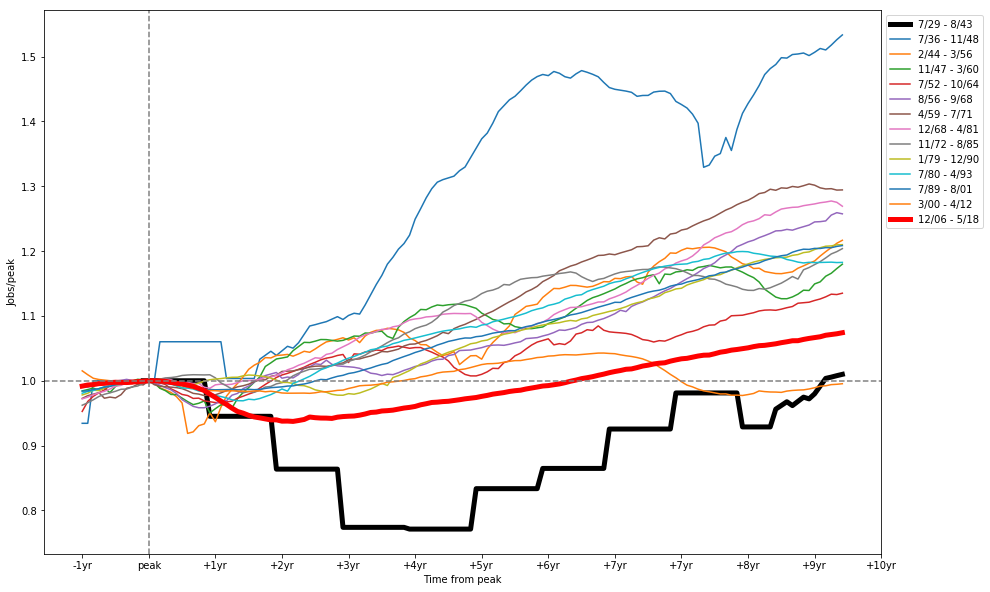

In [154]:
fig, axes = plt.subplots(figsize=(15,10))
for i in range(14):
    if i == 0:
        recessions[i].plot(y='PAYEMS', ax=axes, linewidth=5, color='black')
    elif i == 13:
        recessions[i].plot(y='PAYEMS', ax=axes, linewidth=5, color='red')
    else:
        recessions[i].plot(y='PAYEMS', ax=axes)
    
plt.legend(['7/29 - 8/43', '7/36 - 11/48', '2/44 - 3/56', 
           '11/47 - 3/60', '7/52 - 10/64', '8/56 - 9/68', 
           '4/59 - 7/71', '12/68 - 4/81', '11/72 - 8/85', 
           '1/79 - 12/90', '7/80 - 4/93', '7/89 - 8/01', 
           '3/00 - 4/12', '12/06 - 5/18'], bbox_to_anchor=(1,1))

plt.xticks(np.arange(0, 145, 12), ['-1yr', 'peak', '+1yr', '+2yr', '+3yr', '+4yr', '+5yr', '+6yr', '+7yr', '+7yr', '+8yr', '+9yr', '+10yr'])
plt.ylabel('Jobs/peak')
plt.xlabel('Time from peak')

plt.axvline(x=12, c='grey', ls='--')
plt.axhline(y=1, c='grey', ls='--')

plt.show()